In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "/Users/sushilagadal/Desktop/label_dat.csv"
data_raw = pd.read_csv(data_path)

print("Number of rows in data =" ,data_raw.shape[0])
print("Number of columns in data =" ,data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

Number of rows in data = 24783
Number of columns in data = 7


**Sample data:**


,Id,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

Id                    0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64


In [4]:
rowSums = data_raw.iloc[:,2:6].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  24783
Number of clean comments =  0
Number of comments with labels = 24783


In [5]:
categories = list(data_raw.columns.values)
categories = categories[2:6]
print(categories)

['hate_speech', 'offensive_language', 'neither', 'class']


In [6]:
counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,hate_speech,6952
1,offensive_language,59819
2,neither,13612
3,class,27516


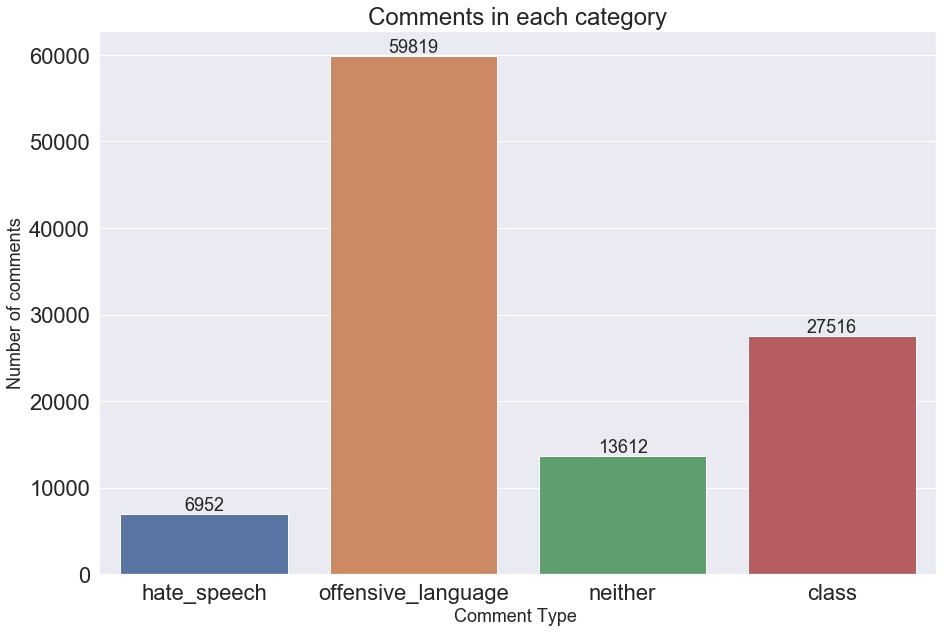

In [7]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,10))

ax= sns.barplot(categories, data_raw.iloc[:,2:6].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

rects = ax.patches
labels = data_raw.iloc[:,2:6].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

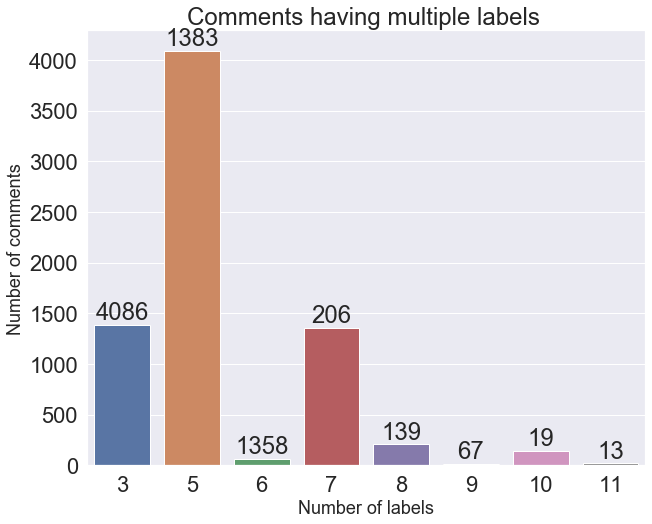

In [8]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(10,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

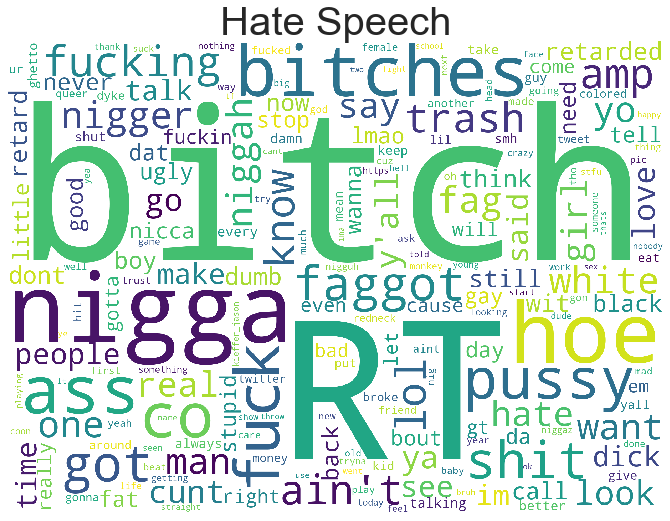

In [9]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))


# hate_speech
subset = data_raw[data_raw.hate_speech==1]
text = subset.tweet.values
cloud_identity_hate = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Hate Speech",fontsize=40)
plt.imshow(cloud_identity_hate)

plt.show()


In [10]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(2000, 7)

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [12]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [13]:
data['tweet'] = data['tweet'].str.lower()
data['tweet'] = data['tweet'].apply(cleanHtml)
data['tweet'] = data['tweet'].apply(cleanPunc)
data['tweet'] = data['tweet'].apply(keepAlpha)
data.head()

,Id,count,hate_speech,offensive_language,neither,class,tweet
17346,17741,3,0,3,0,1,rt smokedoutquille bitches say or nah with e...
3291,3377,3,0,3,0,1,gorillaleo fuck your chicken sandwich ho
20171,20616,3,0,3,0,1,rt thewayoftheid viola davis sans wig is sti...
23269,23753,6,1,5,0,1,you can buy a bitch erything in the world i be...
23858,24355,3,2,1,0,0,go get left in a hot car and die bitch


In [14]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['tweet'] = data['tweet'].apply(removeStopWords)
data.head()
    
    

,Id,count,hate_speech,offensive_language,neither,class,tweet
17346,17741,3,0,3,0,1,rt smokedoutquille bitches say nah everyth...
3291,3377,3,0,3,0,1,gorillaleo fuck chicken sandwich ho
20171,20616,3,0,3,0,1,rt thewayoftheid viola davis sans wig still...
23269,23753,6,1,5,0,1,buy bitch erything world bet still find...
23858,24355,3,2,1,0,0,go get left hot car die bitch


In [15]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['tweet'] = data['tweet'].apply(stemming)
data.head()

,Id,count,hate_speech,offensive_language,neither,class,tweet
17346,17741,3,0,3,0,1,rt smokedoutquill bitch say nah everyth im cut...
3291,3377,3,0,3,0,1,gorillaleo fuck chicken sandwich ho
20171,20616,3,0,3,0,1,rt thewayoftheid viola davi san wig still stun...
23269,23753,6,1,5,0,1,buy bitch eryth world bet still find someth co...
23858,24355,3,2,1,0,0,go get left hot car die bitch


In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)
print(train.shape)
print(test.shape)

(1400, 7)
(600, 7)


In [17]:
train_text = train['tweet']
test_text = test['tweet']

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [19]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['Id','tweet', 'count'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['Id','tweet', 'count'], axis=1)
print(y_test)

       hate_speech  offensive_language  neither  class
8500             0                   3        0      1
17119            1                   2        0      1
3179             0                   3        0      1
10400            0                   3        0      1
3739             1                   2        0      1
...            ...                 ...      ...    ...
14196            0                   3        0      1
23845            0                   0        3      2
16198            0                   3        0      1
5242             0                   3        0      1
22163            1                   3        2      1

[600 rows x 4 columns]


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [21]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing hate_speech comments...**
Test accuracy is 0.7966666666666666


**Processing offensive_language comments...**
Test accuracy is 0.57


**Processing neither comments...**
Test accuracy is 0.75


**Processing class comments...**
Test accuracy is 0.7733333333333333


CPU times: user 63.6 ms, sys: 51.8 ms, total: 115 ms
Wall time: 2.24 s


In [22]:
%%time
from sklearn.feature_extraction.text import HashingVectorizer
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([('clf', LogisticRegression()) ])
v = HashingVectorizer(n_features=200)
x_tr = v.transform(train_text)
x_ts = v.transform(test_text)

for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_tr, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_ts)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")
    print(prediction)

**Processing hate_speech comments...**
Test accuracy is 0.785


[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0

In [27]:

import pickle
pickle.dump(LogReg_pipeline, open('model.sav','wb'))

#load the model from disk
loaded_model=pickle.load(open('model.sav','rb'))
example = v.transform(["Fuck bitch "])
results = loaded_model.predict(example)
print(results)    

[1]


In [28]:
example = v.transform(["@lil_Mike_12: Fuck twerking bitch can you cook"])
results = loaded_model.predict(example)
print(results)


[1]


In [31]:
example = v.transform(["you are ugly"])
results = loaded_model.predict(example)
print(results)

[1]


In [32]:
example = v.transform(["I love you"])
results = loaded_model.predict(example)
print(results)

[2]
